#1. Darknet Clone

Runtime => GPU

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14730, done.
remote: Total 14730 (delta 0), reused 0 (delta 0), pack-reused 14730
Receiving objects: 100% (14730/14730), 13.27 MiB | 25.36 MiB/s, done.
Resolving deltas: 100% (10020/10020), done.


In [3]:
!ls -al darknet

total 248
drwxr-xr-x 14 root root  4096 Mar 22 15:41 .
drwxr-xr-x  1 root root  4096 Mar 22 15:41 ..
drwxr-xr-x  4 root root  4096 Mar 22 15:41 3rdparty
drwxr-xr-x  3 root root  4096 Mar 22 15:41 build
-rwxr-xr-x  1 root root  7878 Mar 22 15:41 build.ps1
-rwxr-xr-x  1 root root  1960 Mar 22 15:41 build.sh
drwxr-xr-x  3 root root  4096 Mar 22 15:41 cfg
drwxr-xr-x  2 root root  4096 Mar 22 15:41 .circleci
drwxr-xr-x  3 root root  4096 Mar 22 15:41 cmake
-rw-r--r--  1 root root 21433 Mar 22 15:41 CMakeLists.txt
-rw-r--r--  1 root root  1373 Mar 22 15:41 DarknetConfig.cmake.in
-rw-r--r--  1 root root  9467 Mar 22 15:41 darknet_images.py
-rw-r--r--  1 root root 10334 Mar 22 15:41 darknet.py
-rw-r--r--  1 root root  5227 Mar 22 15:41 darknet_video.py
drwxr-xr-x  3 root root  4096 Mar 22 15:41 data
drwxr-xr-x  8 root root  4096 Mar 22 15:41 .git
drwxr-xr-x  4 root root  4096 Mar 22 15:41 .github
-rw-r--r--  1 root root   588 Mar 22 15:41 .gitignore
-rwxr-xr-x  1 root root   110 Mar 22 15:41 i

In [4]:
%cd darknet

/content/darknet


In [7]:
# change makefile to have GPU,OPENCV, CUDNN enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [8]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [9]:
#Compile Sources
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [11]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-03-22 15:49:18--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  41.3MB/s    in 6.1s    

2021-03-22 15:49:25 (38.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [16]:
!ls -al data

total 1744
drwxr-xr-x  3 root root   4096 Mar 22 15:41 .
drwxr-xr-x 16 root root   4096 Mar 22 15:49 ..
-rw-r--r--  1 root root 140047 Mar 22 15:41 9k.tree
-rw-r--r--  1 root root    387 Mar 22 15:41 coco9k.map
-rw-r--r--  1 root root    625 Mar 22 15:41 coco.names
-rw-r--r--  1 root root 163759 Mar 22 15:41 dog.jpg
-rw-r--r--  1 root root 141886 Mar 22 15:41 eagle.jpg
-rw-r--r--  1 root root 382965 Mar 22 15:41 giraffe.jpg
-rw-r--r--  1 root root     80 Mar 22 15:41 goal.txt
-rw-r--r--  1 root root 133495 Mar 22 15:41 horses.jpg
-rw-r--r--  1 root root 218420 Mar 22 15:41 imagenet.labels.list
-rw-r--r--  1 root root 246356 Mar 22 15:41 imagenet.shortnames.list
drwxr-xr-x  2 root root  20480 Mar 22 15:41 labels
-rw-r--r--  1 root root   5476 Mar 22 15:41 openimages.names
-rw-r--r--  1 root root 113880 Mar 22 15:41 person.jpg
-rw-r--r--  1 root root 174515 Mar 22 15:41 scream.jpg
-rw-r--r--  1 root root    135 Mar 22 15:41 voc.names


In [23]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/horses.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

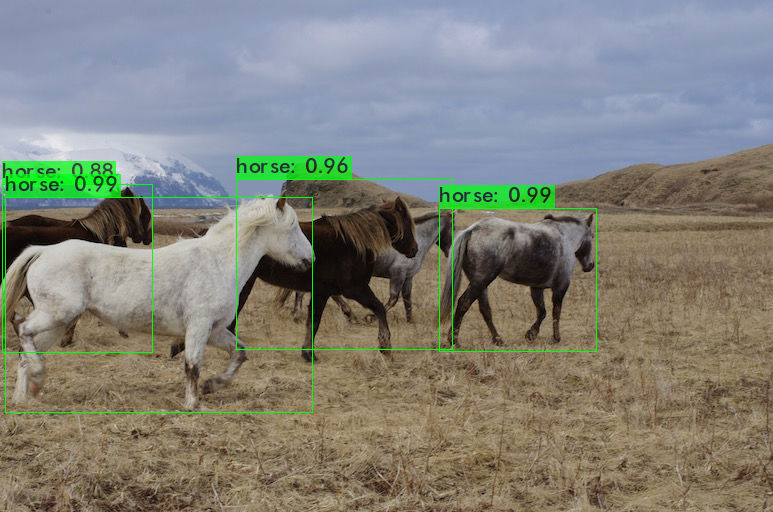

In [24]:
import cv2
from google.colab.patches import cv2_imshow

result = cv2.imread('predictions.jpg')
cv2_imshow(result)